## Codigo base que sera utilizado.

In [5]:
import pandas as pd
df = pd.read_excel('WEOApr2025.xlsx.xlsx', engine='openpyxl')



In [58]:
import pandas as pd
import numpy as np

#Cargar base
#Para evitar errores se debe "guardar como" el excel como un xlsx ya que viene en un formato viejo y llamarlo WEOApr2025.xlsx.
df = pd.read_excel("WEOApr2025.xlsx.xlsx", engine="openpyxl")

#Valores faltantes representados como texto
missing_vals = ["..", "--", "—", "n/a", "N/A"]

#Reemplazar esos valores por np.nan
df.replace(missing_vals, np.nan, inplace=True)

#Verificar cuántos valores faltantes hay por columna antes de filtrar
print(" Valores faltantes por columna (global):")
print(df.isnull().sum().sort_values(ascending=False).head(10))

#Filtrar Argentina
arg_df = df[df["Country"] == "Argentina"].copy()

#Detectar columnas con años como nombre
year_columns = [col for col in arg_df.columns if str(col).isdigit()]

# Convertir columnas numéricas (años) a float
for col in year_columns:
    arg_df[col] = pd.to_numeric(arg_df[col], errors="coerce")

#Verificar valores faltantes solo en Argentina
print("\n Valores faltantes por columna (Argentina):")
missing_arg = arg_df[year_columns].isnull().sum()
print(missing_arg[missing_arg > 0])

#Cuántas filas tienen al menos 1 NaN
print("\n Cantidad de filas con al menos un NaN:", arg_df[year_columns].isnull().any(axis=1).sum())

#Porcentaje de NaNs por fila (para decidir si eliminar algunas observaciones)
arg_df["missing_percent"] = arg_df[year_columns].isnull().mean(axis=1) * 100
print("\n Promedio de % de valores faltantes por fila:", round(arg_df["missing_percent"].mean(), 2))

#Mostrar algunas filas con muchos NaNs
print("\n Ejemplos de observaciones con muchos NaNs:")
print(arg_df[arg_df["missing_percent"] > 50][["WEO Subject Code", "Subject Descriptor", "missing_percent"]].head())

#Eliminar observaciones con +50% de valores faltantes
arg_df_clean = arg_df[arg_df["missing_percent"] < 50].copy()


 Valores faltantes por columna (global):
1980    4829
1981    4688
1982    4640
1983    4596
1984    4566
1985    4485
1986    4431
1987    4408
1988    4316
1989    4255
dtype: int64

 Valores faltantes por columna (Argentina):
1980    29
1981    29
1982    28
1983    28
1984    26
1985    25
1986    25
1987    25
1988    25
1989    24
1990    25
1991    25
1992    23
1993    13
1994    13
1995    13
1996    13
1997    11
1998     9
1999     9
2000     9
2001     9
2002     9
2003     9
2004     9
2005     9
2006     9
2007     9
2008    11
2009    11
2010    11
2011    11
2012    12
2013    14
2014    16
2015    19
2016    17
2017    16
2018    16
2019    16
2020    19
2021    20
2022    21
2023    21
2024    21
2025    21
2026    21
2027    21
2028    21
2029    21
2030    21
dtype: int64

 Cantidad de filas con al menos un NaN: 30

 Promedio de % de valores faltantes por fila: 39.57

 Ejemplos de observaciones con muchos NaNs:
    WEO Subject Code                                 Su

In [40]:
#Filtros para Argentina
argentina_data = df[df["Country"] == "Argentina"]

#Mostrar todas las variables disponibles para Argentina
variables = argentina_data[["WEO Subject Code", "Subject Descriptor"]].drop_duplicates()
variables.head(10)


,WEO Subject Code,Subject Descriptor
264,NGDP_R,"Gross domestic product, constant prices"
265,NGDP_RPCH,"Gross domestic product, constant prices"
266,NGDP,"Gross domestic product, current prices"
267,NGDPD,"Gross domestic product, current prices"
268,PPPGDP,"Gross domestic product, current prices"
269,NGDP_D,"Gross domestic product, deflator"
270,NGDPRPC,"Gross domestic product per capita, constant pr..."
271,NGDPRPPPPC,"Gross domestic product per capita, constant pr..."
272,NGDPPC,"Gross domestic product per capita, current prices"
273,NGDPDPC,"Gross domestic product per capita, current prices"


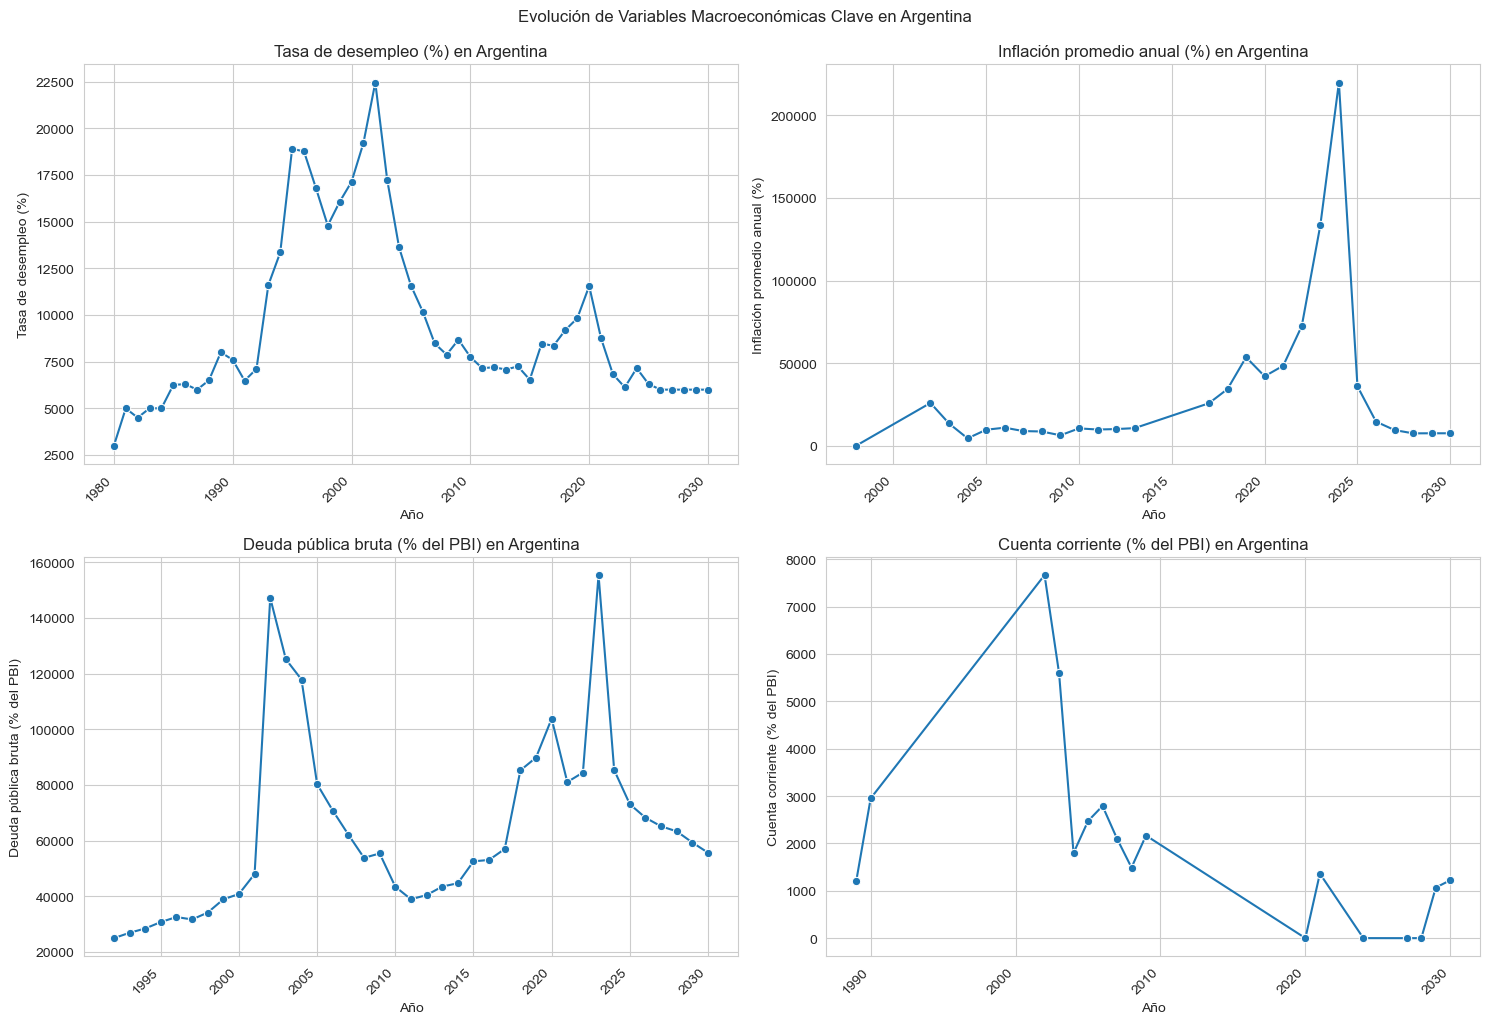

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Cargar base
df = pd.read_excel("WEOApr2025.xlsx.xlsx", engine="openpyxl")

#Valores faltantes representados como texto
missing_vals = ["..", "--", "—", "n/a", "N/A"]

#Reemplazar esos valores por np.nan
df.replace(missing_vals, np.nan, inplace=True)

#Filtrar Argentina
arg_df = df[df["Country"] == "Argentina"].copy()

#Detectar columnas con años como nombre
year_columns = [col for col in arg_df.columns if str(col).isdigit()]

#Convertir columnas numéricas (años) a float
for col in year_columns:
    arg_df[col] = pd.to_numeric(arg_df[col], errors="coerce")

#Variables de interés (reemplazando NGDPDPC con LUR)
variables_interes = ["LUR", "PCPIPCH", "GGXWDG_NGDP", "BCA_NGDPD"]
descripcion_variables = {
    "LUR": "Tasa de desempleo (%)",
    "PCPIPCH": "Inflación promedio anual (%)",
    "GGXWDG_NGDP": "Deuda pública bruta (% del PBI)",
    "BCA_NGDPD": "Cuenta corriente (% del PBI)",
}

#Filtrar el DataFrame para las variables de interés
arg_df_interes = arg_df[arg_df["WEO Subject Code"].isin(variables_interes)].copy()

#Seleccionar las columnas relevantes (código de la variable, descripción y años disponibles)
columnas_mostrar = ["WEO Subject Code", "Subject Descriptor"] + year_columns
arg_data_historica = arg_df_interes[columnas_mostrar].copy()

#Fusionar con la descripción de las variables
arg_data_historica = pd.merge(arg_data_historica, pd.DataFrame(descripcion_variables.items(), columns=["WEO Subject Code", "Descripcion"]), on="WEO Subject Code", how="left")

# Reorganizar las columnas para una mejor visualización
columnas_ordenadas = ["Descripcion"] + ["WEO Subject Code"] + ["Subject Descriptor"] + year_columns
arg_data_historica_preliminar = arg_data_historica[columnas_ordenadas].copy()

# --- Sección de Limpieza de Datos Numéricos ---
arg_data_historica_clean = arg_data_historica_preliminar.copy()
for codigo_variable in variables_interes:
    filas_variable = arg_data_historica_clean[arg_data_historica_clean["WEO Subject Code"] == codigo_variable].index
    for columna_anio in year_columns:
        # Convertir explícitamente a numérico (por si acaso)
        arg_data_historica_clean.loc[filas_variable, columna_anio] = pd.to_numeric(arg_data_historica_clean.loc[filas_variable, columna_anio], errors='coerce')
        # Filtrar valores no positivos (la tasa de desempleo no debería ser negativa, pero por consistencia)
        arg_data_historica_clean.loc[filas_variable, columna_anio] = np.where(arg_data_historica_clean.loc[filas_variable, columna_anio] <= 0, np.nan, arg_data_historica_clean.loc[filas_variable, columna_anio])

#Eliminar filas donde todas las columnas de los años son NaN para una variable específica
arg_data_historica_clean = arg_data_historica_clean.dropna(subset=year_columns, how='all')

# --- Sección de Graficación ---
if not arg_data_historica_clean.empty:
    plt.figure(figsize=(15, 10))
    sns.set_style("whitegrid")

    for i, codigo_variable in enumerate(variables_interes):
        data_variable = arg_data_historica_clean[arg_data_historica_clean["WEO Subject Code"] == codigo_variable].copy()
        if not data_variable.empty:
            descripcion = descripcion_variables[codigo_variable]
            datos_grafico = data_variable[year_columns].T
            datos_grafico.columns = ["Valor"]
            datos_grafico.index.name = "Año"
            datos_grafico = datos_grafico.reset_index()

            plt.subplot(2, 2, i + 1)
            sns.lineplot(x="Año", y="Valor", data=datos_grafico, marker="o")
            plt.title(f"{descripcion} en Argentina")
            plt.xlabel("Año")
            plt.ylabel(descripcion)
            plt.xticks(rotation=45, ha="right")
            plt.tight_layout()
        else:
            print(f"⚠️ No hay datos válidos para graficar '{descripcion}'.")

    plt.suptitle("Evolución de Variables Macroeconómicas Clave en Argentina", y=1.02)
    plt.show()
else:
    print("⚠️ No hay datos válidos para graficar después de la limpieza.")

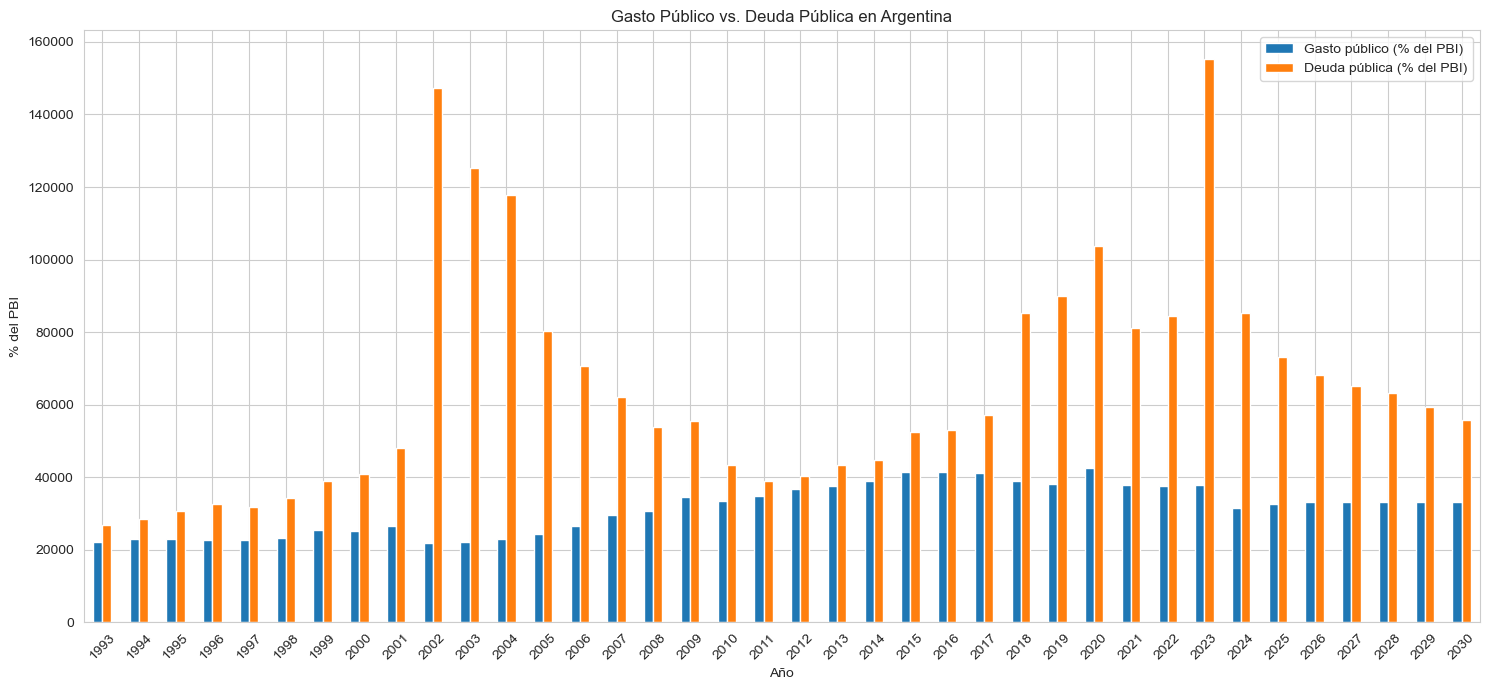

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Cargar base
df = pd.read_excel("WEOApr2025.xlsx.xlsx", engine="openpyxl")

#Reemplazar valores faltantes por NaN
missing_vals = ["..", "--", "—", "n/a", "N/A"]
df.replace(missing_vals, np.nan, inplace=True)

#Filtrar datos de Argentina
arg_df = df[df["Country"] == "Argentina"].copy()

#Años disponibles
year_columns = [col for col in arg_df.columns if str(col).isdigit()]

#Convertir columnas a numéricas
for col in year_columns:
    arg_df[col] = pd.to_numeric(arg_df[col], errors="coerce")

#Filtrar variables: Gasto público y Deuda pública
gasto = arg_df[arg_df["WEO Subject Code"] == "GGX_NGDP"]
deuda = arg_df[arg_df["WEO Subject Code"] == "GGXWDG_NGDP"]

#Crear DataFrame de comparación
comparacion = pd.DataFrame({
    "Año": year_columns,
    "Gasto público (% del PBI)": gasto[year_columns].values.flatten(),
    "Deuda pública (% del PBI)": deuda[year_columns].values.flatten()
}).dropna()

#Configurar gráfico
comparacion.set_index("Año", inplace=True)
comparacion.plot(kind="bar", figsize=(15, 7), title="Gasto Público vs. Deuda Pública en Argentina")
plt.ylabel("% del PBI")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Clustering en base a nuestro codigo.

### Método 1: si querés comparar países entre sí.

C:\Users\luque\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


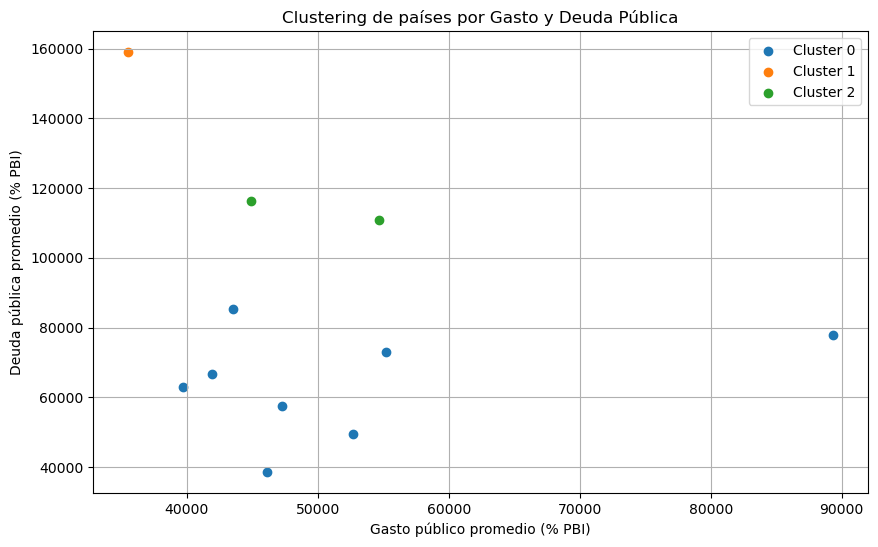

In [23]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cargar datos y limpiar
df = pd.read_excel("WEOApr2025.xlsx.xlsx", engine="openpyxl")
missing_vals = ["..", "--", "—", "n/a", "N/A"]
df.replace(missing_vals, np.nan, inplace=True)

# Filtrar solo gasto y deuda
subset = df[df["WEO Subject Code"].isin(["GGX_NGDP", "GGXWDG_NGDP"])].copy()
year_columns = [col for col in subset.columns if str(col).isdigit()]
subset[year_columns] = subset[year_columns].apply(pd.to_numeric, errors="coerce")

# Promediar por país y variable
pivot = subset.groupby(["Country", "WEO Subject Code"])[year_columns].mean().reset_index()

# Reorganizar: cada fila es un país con columnas: gasto, deuda
pivot_wide = pivot.pivot(index="Country", columns="WEO Subject Code", values=year_columns)
pivot_wide = pivot_wide.dropna(axis=0)  # eliminar países con datos faltantes

# Reorganizar multi-index
pivot_wide.columns = ['_'.join([str(i) for i in col]) for col in pivot_wide.columns]
pivot_wide["Gasto_prom"] = pivot_wide.filter(like="GGX_NGDP").mean(axis=1)
pivot_wide["Deuda_prom"] = pivot_wide.filter(like="GGXWDG_NGDP").mean(axis=1)

# Clustering
X = pivot_wide[["Gasto_prom", "Deuda_prom"]]
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
pivot_wide["Cluster"] = kmeans.labels_

# Visualizar
plt.figure(figsize=(10, 6))
for cluster in sorted(pivot_wide["Cluster"].unique()):
    grupo = pivot_wide[pivot_wide["Cluster"] == cluster]
    plt.scatter(grupo["Gasto_prom"], grupo["Deuda_prom"], label=f"Cluster {cluster}")
plt.xlabel("Gasto público promedio (% PBI)")
plt.ylabel("Deuda pública promedio (% PBI)")
plt.title("Clustering de países por Gasto y Deuda Pública")
plt.legend()
plt.grid(True)
plt.show()


###  Método 2: si querés entender los ciclos fiscales internos de un país en el tiempo.

C:\Users\luque\AppData\Local\Temp\ipykernel_9404\3522715992.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arg_df[year_columns] = arg_df[year_columns].apply(pd.to_numeric, errors="coerce")
C:\Users\luque\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


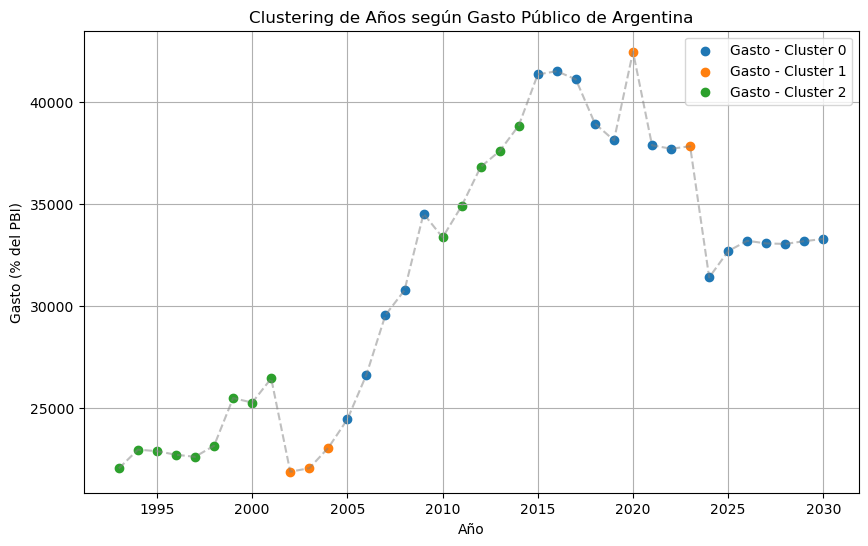

In [25]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cargar y limpiar
df = pd.read_excel("WEOApr2025.xlsx.xlsx", engine="openpyxl")
missing_vals = ["..", "--", "—", "n/a", "N/A"]
df.replace(missing_vals, np.nan, inplace=True)

arg_df = df[df["Country"] == "Argentina"]
year_columns = [col for col in arg_df.columns if str(col).isdigit()]
arg_df[year_columns] = arg_df[year_columns].apply(pd.to_numeric, errors="coerce")

# Obtener gasto y deuda
gasto = arg_df[arg_df["WEO Subject Code"] == "GGX_NGDP"][year_columns].values.flatten()
deuda = arg_df[arg_df["WEO Subject Code"] == "GGXWDG_NGDP"][year_columns].values.flatten()
años = [int(año) for año in year_columns]

# Construir DataFrame para clusterizar
df_cluster = pd.DataFrame({
    "Año": años,
    "Gasto": gasto,
    "Deuda": deuda
}).dropna()

# Clustering por año
X = df_cluster[["Gasto", "Deuda"]]
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
df_cluster["Cluster"] = kmeans.labels_

# Visualizar evolución temporal
plt.figure(figsize=(10, 6))
for cluster in sorted(df_cluster["Cluster"].unique()):
    grupo = df_cluster[df_cluster["Cluster"] == cluster]
    plt.scatter(grupo["Año"], grupo["Gasto"], label=f"Gasto - Cluster {cluster}")
plt.plot(df_cluster["Año"], df_cluster["Gasto"], color='gray', linestyle='--', alpha=0.5)
plt.title("Clustering de Años según Gasto Público de Argentina")
plt.xlabel("Año")
plt.ylabel("Gasto (% del PBI)")
plt.legend()
plt.grid(True)
plt.show()



Iniciando Análisis de Clustering de Años

Vista previa de los datos para clustering (primeras 5 filas):
WEO Subject Code     LUR  PCPIPCH  GGXWDG_NGDP  BCA_NGDPD
Año                                                      
1980              3000.0      NaN          NaN        NaN
1981              5000.0      NaN          NaN        NaN
1982              4500.0      NaN          NaN        NaN
1983              5000.0      NaN          NaN        NaN
1984              5000.0      NaN          NaN        NaN


Dimensiones de los datos después de la imputación: (51, 4)
Valores faltantes después de la imputación: 0


Vista previa de los datos escalados (primeras 5 filas):
WEO Subject Code       LUR       PCPIPCH  GGXWDG_NGDP     BCA_NGDPD
Año                                                                
1980             -1.407942  2.167229e-16          0.0  6.012473e-16
1981             -0.967368  2.167229e-16          0.0  6.012473e-16
1982             -1.077511  2.167229e-16          0.

C:\Users\luque\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\luque\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\luque\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\luque\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

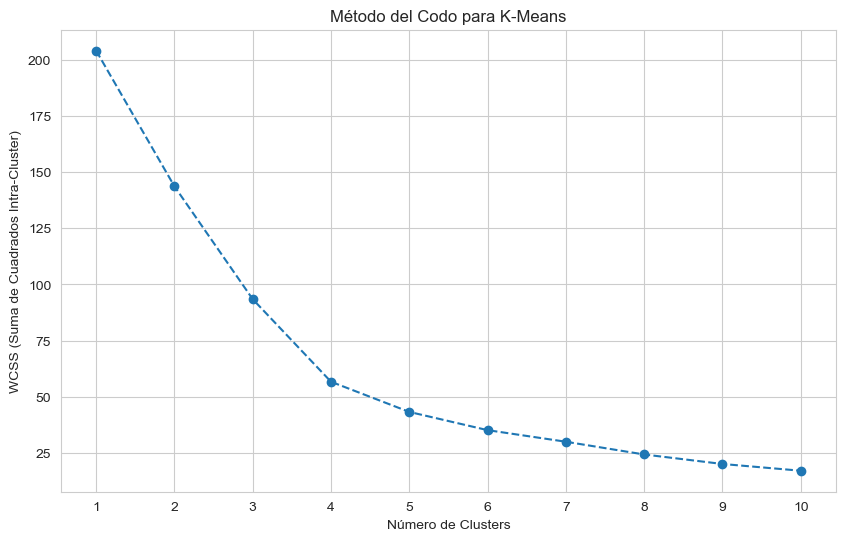

Observa el gráfico del 'Método del Codo'. El 'codo' (punto de inflexión) sugiere un número óptimo de clusters.
Por ejemplo, si el codo está en 3, usaríamos 3 clusters. Para este ejemplo, elegiremos 3 clusters.


Resultados del Clustering K-Means con 3 clusters:
WEO Subject Code     LUR       PCPIPCH   GGXWDG_NGDP    BCA_NGDPD  Cluster
Año                                                                       
1980              3000.0  31145.330556  63934.538462  1993.677706        0
1981              5000.0  31145.330556  63934.538462  1993.677706        0
1982              4500.0  31145.330556  63934.538462  1993.677706        0
1983              5000.0  31145.330556  63934.538462  1993.677706        0
1984              5000.0  31145.330556  63934.538462  1993.677706        0


Características promedio de cada cluster:
WEO Subject Code           LUR        PCPIPCH    GGXWDG_NGDP    BCA_NGDPD
Cluster                                                                  
0                  90

C:\Users\luque\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


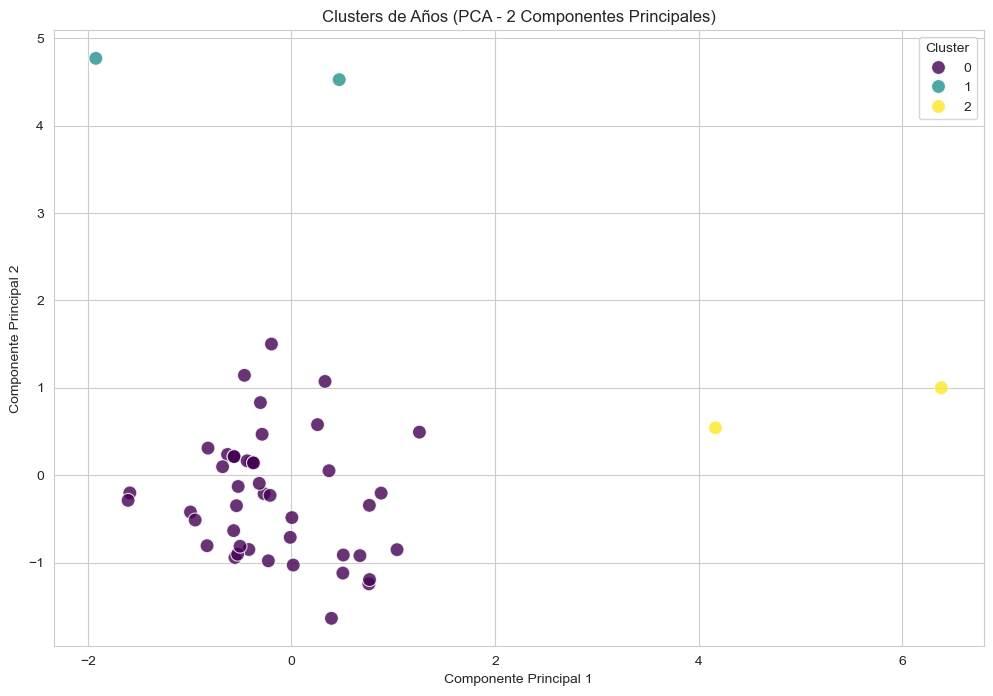

Gráfico de los clusters de años en un espacio de 2 componentes principales (PCA).
Los años dentro de cada cluster muestran similitudes en sus características macroeconómicas.


Conteo de años por cluster:
Cluster
0    47
1     2
2     2
Name: count, dtype: int64


Años en el Cluster 0: [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2025, 2026, 2027, 2028, 2029, 2030]
Años en el Cluster 1: [2023, 2024]
Años en el Cluster 2: [2002, 2003]

Análisis de Clustering Completado



In [7]:



## Implementación de Clustering (Clustering de Años)


print("\n" + "="*50)
print("Iniciando Análisis de Clustering de Años")
print("="*50 + "\n")

# Preparar los datos para clustering: Transponer y limpiar
# Convertir de formato "largo" a "ancho" donde las filas son años y las columnas son variables
data_for_clustering = arg_data_historica_clean.set_index('WEO Subject Code')[year_columns].T

# Renombrar columnas para que sean los códigos de las variables
data_for_clustering.columns = data_for_clustering.columns.map(lambda x: x if x in variables_interes else None)
data_for_clustering = data_for_clustering[variables_interes] # Seleccionar solo las variables de interés

# Asegurarse de que el índice son los años y son numéricos
data_for_clustering.index = pd.to_numeric(data_for_clustering.index)
data_for_clustering.index.name = 'Año'

print("Vista previa de los datos para clustering (primeras 5 filas):")
print(data_for_clustering.head())
print("\n")

# Manejo de valores faltantes: Imputación con la media
# Es crucial manejar los NaNs antes del escalado y clustering
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_for_clustering)
data_imputed_df = pd.DataFrame(data_imputed, columns=data_for_clustering.columns, index=data_for_clustering.index)

print("Dimensiones de los datos después de la imputación:", data_imputed_df.shape)
print("Valores faltantes después de la imputación:", data_imputed_df.isnull().sum().sum())
print("\n")

# Escalado de datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed_df)
data_scaled_df = pd.DataFrame(data_scaled, columns=data_imputed_df.columns, index=data_imputed_df.index)

print("Vista previa de los datos escalados (primeras 5 filas):")
print(data_scaled_df.head())
print("\n")

# Determinar el número óptimo de clusters (Método del Codo)
# Consideramos un rango de 1 a 10 clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10) # n_init para suprimir warning
    kmeans.fit(data_scaled_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo para K-Means')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Suma de Cuadrados Intra-Cluster)')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()

print("Observa el gráfico del 'Método del Codo'. El 'codo' (punto de inflexión) sugiere un número óptimo de clusters.")
print("Por ejemplo, si el codo está en 3, usaríamos 3 clusters. Para este ejemplo, elegiremos 3 clusters.")
print("\n")

# Aplicar K-Means con el número de clusters elegido
n_clusters = 3 # Puedes ajustar este valor basándote en el método del codo
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
clusters = kmeans.fit_predict(data_scaled_df)
data_imputed_df['Cluster'] = clusters

print(f"Resultados del Clustering K-Means con {n_clusters} clusters:")
print(data_imputed_df.head())
print("\n")

# Análisis de los clusters
print("Características promedio de cada cluster:")
cluster_summary = data_imputed_df.groupby('Cluster').mean()
print(cluster_summary)
print("\n")

# Interpretación: Asignar nombres más descriptivos a las variables
cluster_summary_desc = cluster_summary.rename(columns=descripcion_variables)
print("Características promedio de cada cluster (con descripciones completas):")
print(cluster_summary_desc)
print("\n")

# Visualización de los clusters
# PCA para reducir la dimensionalidad y poder graficar en 2D
from sklearn.decomposition import PCA

if data_scaled_df.shape[1] > 2:
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data_scaled_df)
    pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'], index=data_imputed_df.index)
    pca_df['Cluster'] = clusters

    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis', s=100, alpha=0.8)
    plt.title('Clusters de Años (PCA - 2 Componentes Principales)')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.grid(True)
    plt.show()
    print("Gráfico de los clusters de años en un espacio de 2 componentes principales (PCA).")
    print("Los años dentro de cada cluster muestran similitudes en sus características macroeconómicas.")
    print("\n")
else:
    print("No se puede aplicar PCA para visualización 2D si hay menos de 2 variables para el clustering.")
    print("Considera graficar pares de variables para ver la separación de clusters.")


# Contar cuántos años hay en cada cluster
print("Conteo de años por cluster:")
print(data_imputed_df['Cluster'].value_counts().sort_index())
print("\n")

# Mostrar qué años pertenecen a cada cluster
for cluster_id in sorted(data_imputed_df['Cluster'].unique()):
    years_in_cluster = data_imputed_df[data_imputed_df['Cluster'] == cluster_id].index.tolist()
    print(f"Años en el Cluster {cluster_id}: {years_in_cluster}")

print("\n" + "="*50)
print("Análisis de Clustering Completado")
print("="*50 + "\n")


DEMOSTRACIÓN DE CLUSTERING PROBLEMÁTICO

DEBUG: Columnas de años disponibles: [1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
Intentando clustering con un conjunto muy limitado de años: [2020, 2021, 2022]

Datos para clustering problemático (años limitados):
WEO Subject Code      LUR  PCPIPCH  GGXWDG_NGDP  BCA_NGDPD
Año                                                       
2020              11550.0  42015.0     103816.0      0.698
2021               8750.0  48409.0      81043.0   1363.000
2022               6825.0  72431.0      84463.0        NaN
Número de puntos de datos (años) para clustering: 3

Datos escalados para clustering problemático:
WEO Subject Code       LUR   PCPIPCH  GGXWDG_NGDP  BCA_NGDPD
Año                       

C:\Users\luque\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


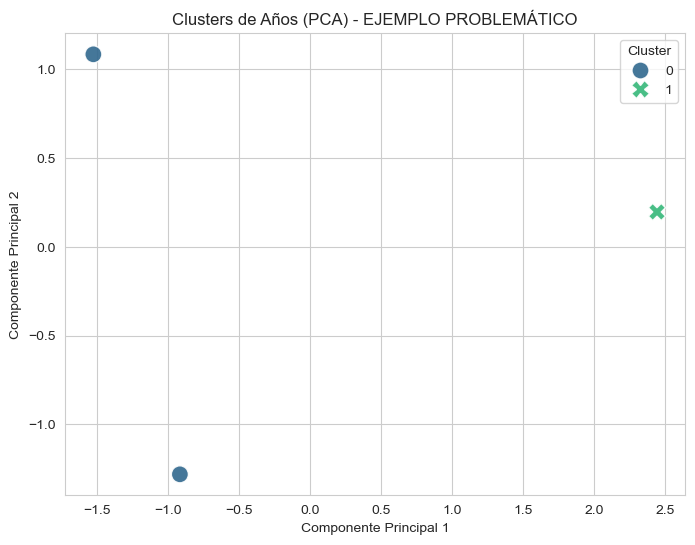


Este gráfico puede mostrar clusters triviales (ej. cada punto es un cluster) o una separación artificial debido a la escasez de datos.

FIN DE DEMOSTRACIÓN DE CLUSTERING PROBLEMÁTICO



In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

# --- Cargar y Preprocesar Datos (igual que tu código original) ---
df = pd.read_excel("WEOApr2025.xlsx.xlsx", engine="openpyxl")
missing_vals = ["..", "--", "—", "n/a", "N/A"]
df.replace(missing_vals, np.nan, inplace=True)
arg_df = df[df["Country"] == "Argentina"].copy()
year_columns = [col for col in arg_df.columns if str(col).isdigit()]
for col in year_columns:
    arg_df[col] = pd.to_numeric(arg_df[col], errors="coerce")

variables_interes = ["LUR", "PCPIPCH", "GGXWDG_NGDP", "BCA_NGDPD"]
descripcion_variables = {
    "LUR": "Tasa de desempleo (%)",
    "PCPIPCH": "Inflación promedio anual (%)",
    "GGXWDG_NGDP": "Deuda pública bruta (% del PBI)",
    "BCA_NGDPD": "Cuenta corriente (% del PBI)",
}

arg_df_interes = arg_df[arg_df["WEO Subject Code"].isin(variables_interes)].copy()
columnas_mostrar = ["WEO Subject Code", "Subject Descriptor"] + year_columns
arg_data_historica = arg_df_interes[columnas_mostrar].copy()
arg_data_historica = pd.merge(arg_data_historica, pd.DataFrame(descripcion_variables.items(), columns=["WEO Subject Code", "Descripcion"]), on="WEO Subject Code", how="left")
columnas_ordenadas = ["Descripcion"] + ["WEO Subject Code"] + ["Subject Descriptor"] + year_columns
arg_data_historica_preliminar = arg_data_historica[columnas_ordenadas].copy()

arg_data_historica_clean = arg_data_historica_preliminar.copy()
for codigo_variable in variables_interes:
    filas_variable = arg_data_historica_clean[arg_data_historica_clean["WEO Subject Code"] == codigo_variable].index
    for columna_anio in year_columns:
        arg_data_historica_clean.loc[filas_variable, columna_anio] = pd.to_numeric(arg_data_historica_clean.loc[filas_variable, columna_anio], errors='coerce')
        arg_data_historica_clean.loc[filas_variable, columna_anio] = np.where(arg_data_historica_clean.loc[filas_variable, columna_anio] <= 0, np.nan, arg_data_historica_clean.loc[filas_variable, columna_anio])
arg_data_historica_clean = arg_data_historica_clean.dropna(subset=year_columns, how='all')

# --- Sección de Clustering con Problemas ---
print("\n" + "="*50)
print("DEMOSTRACIÓN DE CLUSTERING PROBLEMÁTICO")
print("="*50 + "\n")

# Reducir los años drásticamente para forzar un escenario problemático
# Seleccionamos solo 3 años para el clustering
# Esto es intencional para mostrar el problema de datos insuficientes para clustering
problematic_years = [2020, 2021, 2022] # Años de ejemplo que pueden ser pocos
print(f"DEBUG: Columnas de años disponibles: {year_columns}")

# Asegurarse de que los años problemáticos estén en year_columns
actual_problematic_years = [y for y in problematic_years if y in year_columns]

if not actual_problematic_years:
    print(f"ADVERTENCIA: Los años {problematic_years} no se encontraron en los datos disponibles. Usando los primeros 3 años.")
    actual_problematic_years = year_columns[:3]
    if len(actual_problematic_years) == 0:
        print("ERROR: No hay años disponibles para el clustering. Por favor, revisa tus datos de entrada.")
        exit() # Termina el script si no hay años

print(f"Intentando clustering con un conjunto muy limitado de años: {actual_problematic_years}")

data_for_clustering_problem = arg_data_historica_clean.set_index('WEO Subject Code')[actual_problematic_years].T

# Renombrar columnas
data_for_clustering_problem.columns = data_for_clustering_problem.columns.map(lambda x: x if x in variables_interes else None)
data_for_clustering_problem = data_for_clustering_problem[variables_interes]

# Asegurarse de que el índice son los años y son numéricos
data_for_clustering_problem.index = pd.to_numeric(data_for_clustering_problem.index)
data_for_clustering_problem.index.name = 'Año'

print("\nDatos para clustering problemático (años limitados):")
print(data_for_clustering_problem)
print(f"Número de puntos de datos (años) para clustering: {len(data_for_clustering_problem)}")

# --- Manejo de valores faltantes: Imputación con la media ---
imputer = SimpleImputer(strategy='mean')
data_imputed_problem = imputer.fit_transform(data_for_clustering_problem)
data_imputed_df_problem = pd.DataFrame(data_imputed_problem, columns=data_for_clustering_problem.columns, index=data_for_clustering_problem.index)

# --- Escalado de datos ---
scaler = StandardScaler()
data_scaled_problem = scaler.fit_transform(data_imputed_df_problem)
data_scaled_df_problem = pd.DataFrame(data_scaled_problem, columns=data_imputed_df_problem.columns, index=data_imputed_df_problem.index)

print("\nDatos escalados para clustering problemático:")
print(data_scaled_df_problem)

# --- Intentar K-Means con un número de clusters potencialmente problemático ---
# Si tenemos solo 3 puntos de datos, y pedimos 3 clusters, cada punto será un cluster.
# Si pedimos más clusters que puntos de datos, K-Means fallará o dará advertencias.
n_clusters_problem = min(3, len(data_scaled_df_problem) - 1) # Aseguramos que n_clusters sea <= n_samples - 1
if n_clusters_problem <= 0:
    print("\nERROR: No hay suficientes puntos de datos para crear clusters (quizás solo hay 1 año o menos).")
else:
    print(f"\nIntentando K-Means con n_clusters = {n_clusters_problem} (potencialmente problemático para pocos datos)")
    try:
        # Aquí podría aparecer una advertencia si n_clusters es igual a n_samples,
        # o un error si n_clusters es mayor a n_samples
        kmeans_problem = KMeans(n_clusters=n_clusters_problem, init='k-means++', random_state=42, n_init=10)
        clusters_problem = kmeans_problem.fit_predict(data_scaled_df_problem)
        data_imputed_df_problem['Cluster'] = clusters_problem

        print("\nResultados del Clustering Problemático:")
        print(data_imputed_df_problem)

        print("\nCaracterísticas promedio de cada cluster (pueden no ser significativas):")
        print(data_imputed_df_problem.groupby('Cluster').mean().rename(columns=descripcion_variables))

        print("\nConteo de años por cluster:")
        print(data_imputed_df_problem['Cluster'].value_counts().sort_index())

        if data_scaled_df_problem.shape[1] > 1 and len(data_scaled_df_problem) > 1:
            pca_problem = PCA(n_components=min(2, data_scaled_df_problem.shape[1]))
            principal_components_problem = pca_problem.fit_transform(data_scaled_df_problem)
            pca_df_problem = pd.DataFrame(data=principal_components_problem, columns=[f'PC{i+1}' for i in range(principal_components_problem.shape[1])], index=data_imputed_df_problem.index)
            pca_df_problem['Cluster'] = clusters_problem

            plt.figure(figsize=(8, 6))
            sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df_problem, palette='viridis', s=150, alpha=0.9, style='Cluster')
            plt.title('Clusters de Años (PCA) - EJEMPLO PROBLEMÁTICO')
            plt.xlabel('Componente Principal 1')
            plt.ylabel('Componente Principal 2')
            plt.grid(True)
            plt.show()
            print("\nEste gráfico puede mostrar clusters triviales (ej. cada punto es un cluster) o una separación artificial debido a la escasez de datos.")
        else:
            print("\nNo se puede generar gráfico PCA para menos de 2 componentes o 2 puntos de datos.")

    except ValueError as e:
        print(f"\n¡ERROR ESPERADO! K-Means falló debido a la configuración de los datos:")
        print(f"Mensaje de error: {e}")
        print("\nEsto ocurre a menudo cuando el número de clusters solicitado es mayor o igual al número de muestras, o cuando hay muy pocos puntos de datos.")
    except Exception as e:
        print(f"\nSe produjo un error inesperado durante el clustering: {e}")

print("\n" + "="*50)
print("FIN DE DEMOSTRACIÓN DE CLUSTERING PROBLEMÁTICO")
print("="*50 + "\n")


DEMOSTRACIÓN DE VENTAJAS DEL CLUSTERING PARA ANÁLISIS MACROECONÓMICO

Paso 1: Datos preparados para clustering (años como filas, variables como columnas):
WEO Subject Code     LUR  PCPIPCH  GGXWDG_NGDP  BCA_NGDPD
Año                                                      
1980              3000.0      NaN          NaN        NaN
1981              5000.0      NaN          NaN        NaN
1982              4500.0      NaN          NaN        NaN
1983              5000.0      NaN          NaN        NaN
1984              5000.0      NaN          NaN        NaN
Dimensiones: (51, 4)

Paso 2: Datos después de la imputación de valores faltantes (media):
Valores NaN restantes: 0

Paso 3: Datos escalados (media=0, desviación estándar=1):
WEO Subject Code       LUR       PCPIPCH  GGXWDG_NGDP     BCA_NGDPD
Año                                                                
1980             -1.407942  2.167229e-16          0.0  6.012473e-16
1981             -0.967368  2.167229e-16          0.0  6.01

C:\Users\luque\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\luque\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\luque\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\luque\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

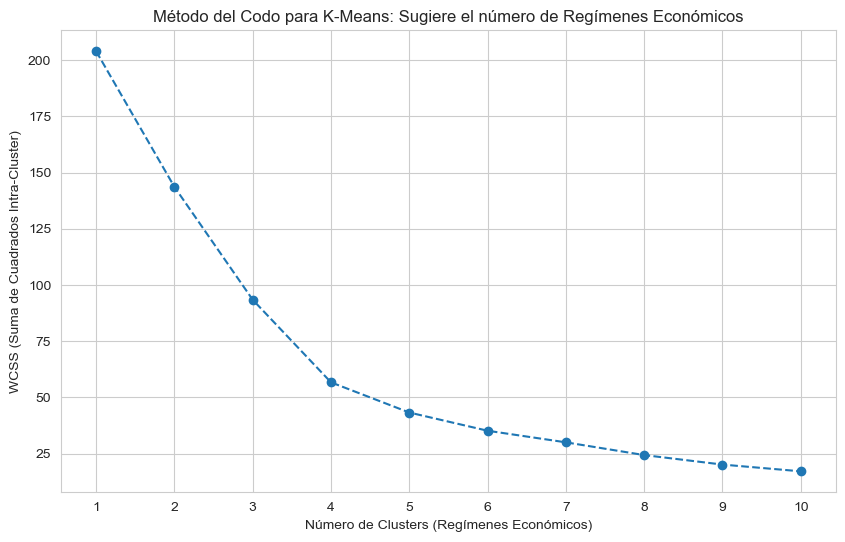

Paso 4: El gráfico del 'Método del Codo' ayuda a elegir un número de clusters.
Para este ejemplo, elegiremos 3 clusters (un número común para diferenciar regímenes).

Paso 5: Clusters asignados a cada año. Primeras 5 filas:
WEO Subject Code     LUR       PCPIPCH   GGXWDG_NGDP    BCA_NGDPD  Cluster
Año                                                                       
1980              3000.0  31145.330556  63934.538462  1993.677706        0
1981              5000.0  31145.330556  63934.538462  1993.677706        0
1982              4500.0  31145.330556  63934.538462  1993.677706        0
1983              5000.0  31145.330556  63934.538462  1993.677706        0
1984              5000.0  31145.330556  63934.538462  1993.677706        0


=== VENTAJAS CLAVE DEL CLUSTERING REVELADAS ===
----------------------------------------------

Ventaja 1: Caracterización de Regímenes Económicos (¿Qué define cada cluster?)

Características promedio de cada 'Régimen Económico' (Cluster):
WEO Subje

C:\Users\luque\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


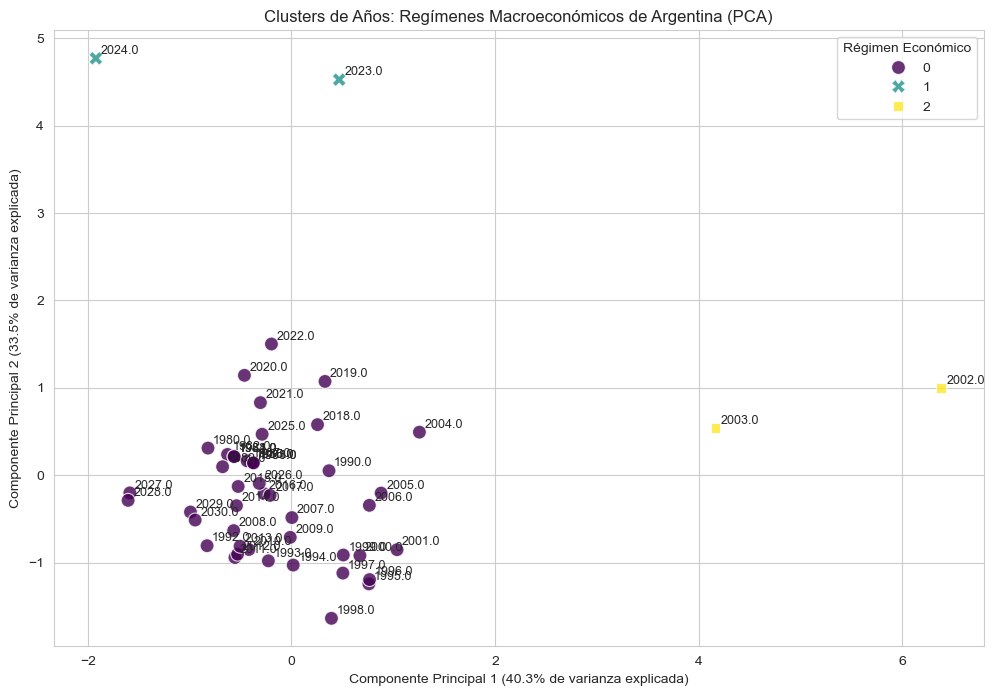

Análisis del gráfico PCA:
- Este gráfico permite visualizar los clusters de años en un espacio 2D.
- Los puntos de cada color (cluster) están más cerca entre sí, indicando similitud en sus características macroeconómicas.
- Las etiquetas de los años nos permiten ver qué años específicos pertenecen a cada grupo.
- Esto ofrece una vista *consolidada* de cómo se agrupan los años, algo imposible con gráficos de línea individuales.

DEMOSTRACIÓN DE VENTAJAS DEL CLUSTERING FINALIZADA



In [15]:
## Aplicando Clustering para Descubrir Regímenes Económicos


print("\n" + "="*70)
print("DEMOSTRACIÓN DE VENTAJAS DEL CLUSTERING PARA ANÁLISIS MACROECONÓMICO")
print("="*70 + "\n")

# 1. Preparar los datos para clustering: Cada fila es un año, columnas son variables
# Convertir de formato "largo" a "ancho"
data_for_clustering = arg_data_historica_clean.set_index('WEO Subject Code')[year_columns].T

# Renombrar columnas para que sean los códigos de las variables
data_for_clustering.columns = data_for_clustering.columns.map(lambda x: x if x in variables_interes else None)
data_for_clustering = data_for_clustering[variables_interes] # Seleccionar solo las variables de interés

# Asegurarse de que el índice son los años y son numéricos
data_for_clustering.index = pd.to_numeric(data_for_clustering.index)
data_for_clustering.index.name = 'Año'

print("Paso 1: Datos preparados para clustering (años como filas, variables como columnas):")
print(data_for_clustering.head())
print(f"Dimensiones: {data_for_clustering.shape}\n")

# 2. Manejo de valores faltantes: Imputación con la media (necesario para K-Means)
imputer = SimpleImputer(strategy='mean')
data_imputed = imputer.fit_transform(data_for_clustering)
data_imputed_df = pd.DataFrame(data_imputed, columns=data_for_clustering.columns, index=data_for_clustering.index)

print("Paso 2: Datos después de la imputación de valores faltantes (media):")
print(f"Valores NaN restantes: {data_imputed_df.isnull().sum().sum()}\n")

# 3. Escalado de datos: Crucial para K-Means con variables de diferentes rangos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_imputed_df)
data_scaled_df = pd.DataFrame(data_scaled, columns=data_imputed_df.columns, index=data_imputed_df.index)

print("Paso 3: Datos escalados (media=0, desviación estándar=1):")
print(data_scaled_df.head())
print("\n")

# 4. Determinar el número óptimo de clusters (Método del Codo para ilustrar la elección)
# Aunque para un análisis real podrías validar con conocimiento de dominio
wcss = []
max_clusters = min(10, data_scaled_df.shape[0] - 1) # Asegurarse de no pedir más clusters que puntos de datos - 1
if max_clusters < 1:
    print("No hay suficientes datos para el método del codo o clustering.")
else:
    for i in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
        kmeans.fit(data_scaled_df)
        wcss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
    plt.title('Método del Codo para K-Means: Sugiere el número de Regímenes Económicos')
    plt.xlabel('Número de Clusters (Regímenes Económicos)')
    plt.ylabel('WCSS (Suma de Cuadrados Intra-Cluster)')
    plt.xticks(np.arange(1, max_clusters + 1, 1))
    plt.grid(True)
    plt.show()

    print("Paso 4: El gráfico del 'Método del Codo' ayuda a elegir un número de clusters.")
    print("Para este ejemplo, elegiremos 3 clusters (un número común para diferenciar regímenes).\n")

# 5. Aplicar K-Means con un número de clusters elegido (ej. 3 regímenes)
n_clusters_chosen = 3 # Basado en la observación del codo o conocimiento del dominio
if data_scaled_df.shape[0] < n_clusters_chosen:
    print(f"ADVERTENCIA: El número de años ({data_scaled_df.shape[0]}) es menor que el número de clusters deseado ({n_clusters_chosen}). Ajustando clusters a {data_scaled_df.shape[0]-1}.")
    n_clusters_chosen = data_scaled_df.shape[0] - 1
    if n_clusters_chosen < 1:
        print("No hay suficientes años para formar clusters significativos. No se realizará el clustering.")
        exit() # Termina el script si no hay suficientes datos
    print(f"Clustering ajustado a {n_clusters_chosen} clusters.\n")


kmeans = KMeans(n_clusters=n_clusters_chosen, init='k-means++', random_state=42, n_init=10)
clusters = kmeans.fit_predict(data_scaled_df)
data_imputed_df['Cluster'] = clusters # Asignar el cluster a cada año

print("Paso 5: Clusters asignados a cada año. Primeras 5 filas:")
print(data_imputed_df.head())
print("\n")

# --- VENTAJAS CLARAS DEL CLUSTERING ---

print("=== VENTAJAS CLAVE DEL CLUSTERING REVELADAS ===")
print("----------------------------------------------\n")

# Ventaja 1: Caracterización de Regímenes Económicos
print("Ventaja 1: Caracterización de Regímenes Económicos (¿Qué define cada cluster?)\n")
cluster_summary = data_imputed_df.groupby('Cluster').mean()
cluster_summary_desc = cluster_summary.rename(columns=descripcion_variables)

print("Características promedio de cada 'Régimen Económico' (Cluster):")
print(cluster_summary_desc.round(2))
print("\n")
print("Análisis de la tabla anterior:")
print("- Cada fila representa un 'régimen económico' distinto.")
print("- Podemos ver combinaciones de variables que definen estos regímenes.")
print("- Ejemplo: Un cluster podría tener alta inflación y deuda, otro bajo desempleo y superávit.")
print("Esta tabla es la *síntesis* de cómo se comportan todas las variables en cada tipo de periodo.")
print("Es mucho más difícil sacar estas conclusiones solo mirando gráficos de línea individuales.")
print("\n")

# Ventaja 2: Identificación de Años en Cada Régimen
print("Ventaja 2: Identificación de Años Específicos dentro de cada Régimen\n")
print("Años que pertenecen a cada 'Régimen Económico' (Cluster):\n")
for cluster_id in sorted(data_imputed_df['Cluster'].unique()):
    years_in_cluster = data_imputed_df[data_imputed_df['Cluster'] == cluster_id].index.tolist()
    print(f"Régimen {cluster_id}: {years_in_cluster}")
print("\n")
print("Análisis de la lista anterior:")
print("- Esto nos permite identificar rápidamente qué años de la historia de Argentina comparten condiciones macroeconómicas similares.")
print("- Podemos asociar estos periodos con eventos históricos o cambios de políticas para entender por qué se agruparon de esa manera.")
print("Por ejemplo, ¿los años de crisis se agrupan en un cluster? ¿Los años de auge en otro?")
print("\n")

# Ventaja 3: Visualización de Agrupaciones Multidimensionales
print("Ventaja 3: Visualización de las Agrupaciones (Reducción de Dimensionalidad con PCA)\n")
if data_scaled_df.shape[1] > 1: # Solo si hay al menos 2 dimensiones para PCA
    pca = PCA(n_components=2)
    principal_components = pca.fit_transform(data_scaled_df)
    pca_df = pd.DataFrame(data=principal_components, columns=['Componente Principal 1', 'Componente Principal 2'], index=data_imputed_df.index)
    pca_df['Cluster'] = clusters
    pca_df['Año'] = pca_df.index # Añadir año como columna para etiquetas

    plt.figure(figsize=(12, 8))
    sns.scatterplot(x='Componente Principal 1', y='Componente Principal 2', hue='Cluster', data=pca_df,
                    palette='viridis', s=100, alpha=0.8, style='Cluster')

    # Añadir etiquetas de año a los puntos
    for i, row in pca_df.iterrows():
        plt.text(row['Componente Principal 1'] + 0.05, row['Componente Principal 2'] + 0.05, str(row['Año']), fontsize=9)

    plt.title('Clusters de Años: Regímenes Macroeconómicos de Argentina (PCA)')
    plt.xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]*100:.1f}% de varianza explicada)')
    plt.ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1]*100:.1f}% de varianza explicada)')
    plt.grid(True)
    plt.legend(title='Régimen Económico')
    plt.show()

    print("Análisis del gráfico PCA:")
    print("- Este gráfico permite visualizar los clusters de años en un espacio 2D.")
    print("- Los puntos de cada color (cluster) están más cerca entre sí, indicando similitud en sus características macroeconómicas.")
    print("- Las etiquetas de los años nos permiten ver qué años específicos pertenecen a cada grupo.")
    print("- Esto ofrece una vista *consolidada* de cómo se agrupan los años, algo imposible con gráficos de línea individuales.")
else:
    print("No se puede generar gráfico PCA porque el número de variables es menor a 2.")


print("\n" + "="*70)
print("DEMOSTRACIÓN DE VENTAJAS DEL CLUSTERING FINALIZADA")
print("===================================================\n")

C:\Users\luque\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


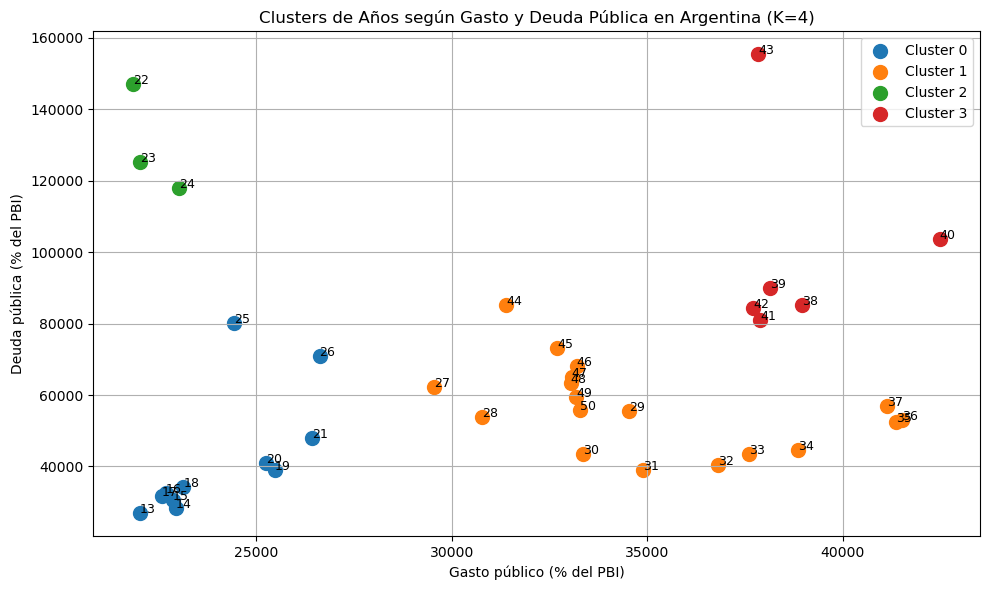

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Cargar base
df = pd.read_excel("WEOApr2025.xlsx.xlsx", engine="openpyxl")

# Reemplazar valores faltantes por NaN
missing_vals = ["..", "--", "—", "n/a", "N/A"]
df.replace(missing_vals, np.nan, inplace=True)

# Filtrar datos de Argentina
arg_df = df[df["Country"] == "Argentina"].copy()

# Años disponibles
year_columns = [col for col in arg_df.columns if str(col).isdigit()]

# Convertir columnas a numéricas
for col in year_columns:
    arg_df[col] = pd.to_numeric(arg_df[col], errors="coerce")

# Filtrar variables: Gasto público y Deuda pública
gasto = arg_df[arg_df["WEO Subject Code"] == "GGX_NGDP"]
deuda = arg_df[arg_df["WEO Subject Code"] == "GGXWDG_NGDP"]

# Crear DataFrame de comparación
comparacion = pd.DataFrame({
    "Año": year_columns,
    "Gasto público (% del PBI)": gasto[year_columns].values.flatten(),
    "Deuda pública (% del PBI)": deuda[year_columns].values.flatten()
}).dropna()

# Clustering (KMeans con k=4)
X = comparacion[["Gasto público (% del PBI)", "Deuda pública (% del PBI)"]]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
comparacion["Cluster"] = kmeans.fit_predict(X_scaled)

# Visualización
plt.figure(figsize=(10, 6))
for cluster in range(4):
    cluster_data = comparacion[comparacion["Cluster"] == cluster]
    plt.scatter(cluster_data["Gasto público (% del PBI)"],
                cluster_data["Deuda pública (% del PBI)"],
                label=f"Cluster {cluster}", s=100)

for año, row in comparacion.iterrows():
    plt.text(row["Gasto público (% del PBI)"] + 0.1,
             row["Deuda pública (% del PBI)"] + 0.1,
             str(año), fontsize=9)


plt.xlabel("Gasto público (% del PBI)")
plt.ylabel("Deuda pública (% del PBI)")
plt.title("Clusters de Años según Gasto y Deuda Pública en Argentina (K=4)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
